**Importing Libraries**

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [122]:
df = sns.load_dataset("titanic")

In [123]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the dataset**

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [126]:
df.drop(["embarked","class", "alive"], axis = 1, inplace = True)

In [127]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Explainatory Data Analysis (EDA)**

In [129]:
null_num = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [130]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

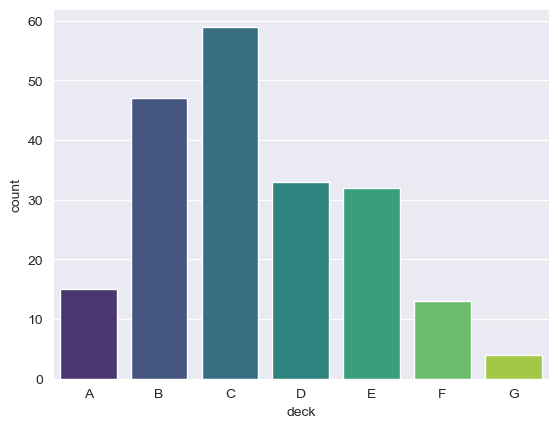

In [131]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

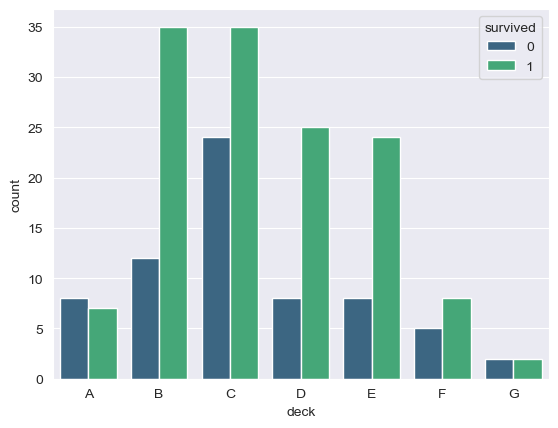

In [132]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue = "survived",data = df, palette = "viridis")

In [133]:
df.drop(["deck"], axis = 1, inplace = True)

In [134]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

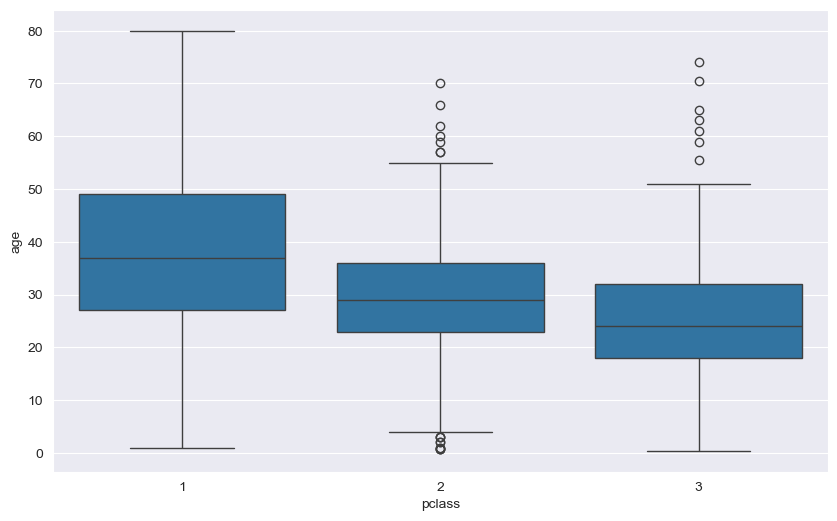

In [135]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [136]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age
    

In [137]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [138]:
null_num = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
null_num

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]

In [139]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [140]:
df.dropna(inplace = True)

In [141]:
null_num = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

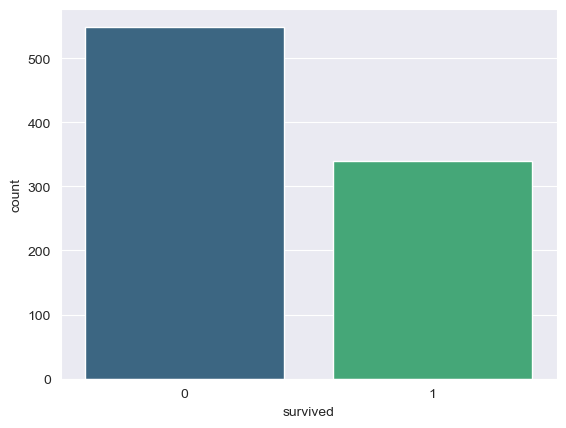

In [142]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [143]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

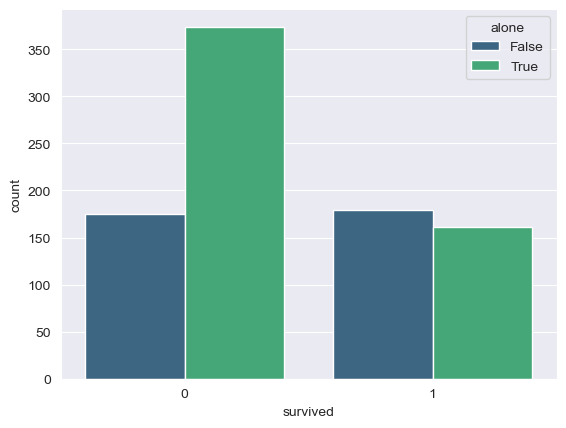

In [144]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "alone", data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

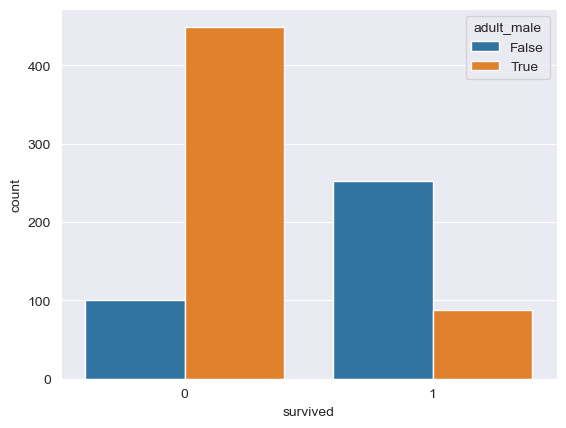

In [145]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "adult_male", data = df)

<Axes: xlabel='survived', ylabel='count'>

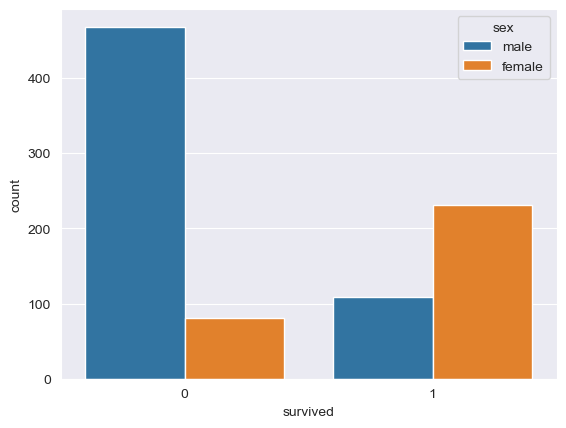

In [146]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "sex", data = df)

<Axes: xlabel='survived', ylabel='count'>

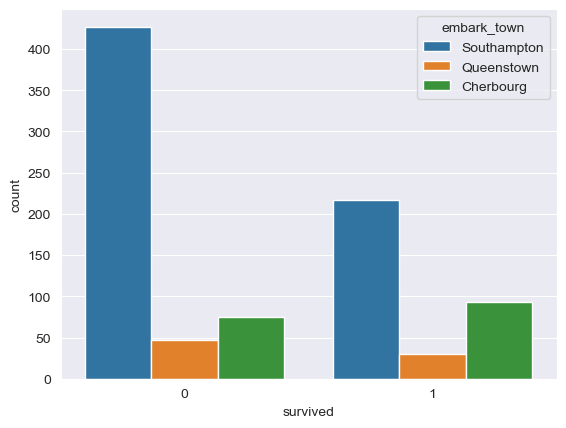

In [147]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "embark_town", data = df)

In [148]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

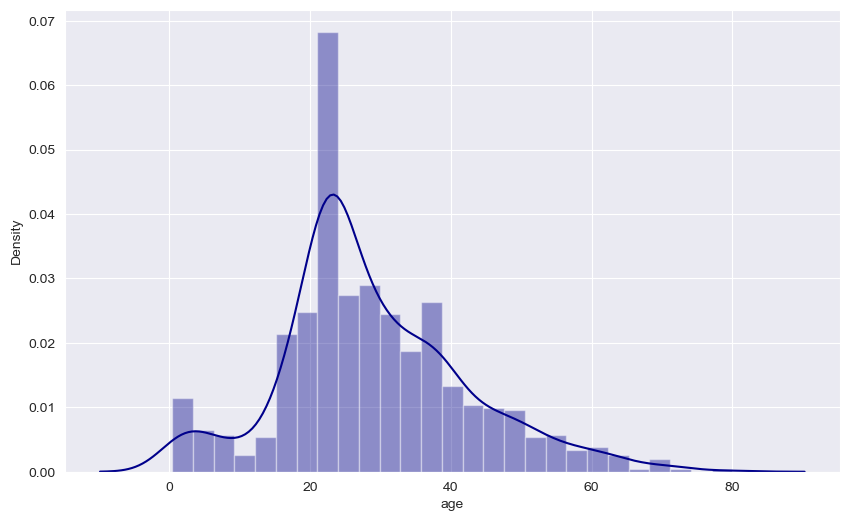

In [149]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkblue")

<Axes: xlabel='fare', ylabel='Density'>

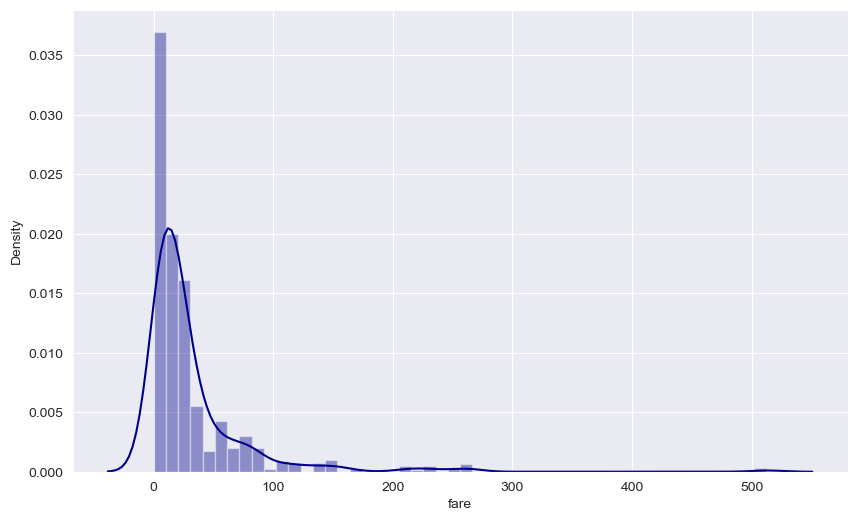

In [150]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkblue")

In [151]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: >

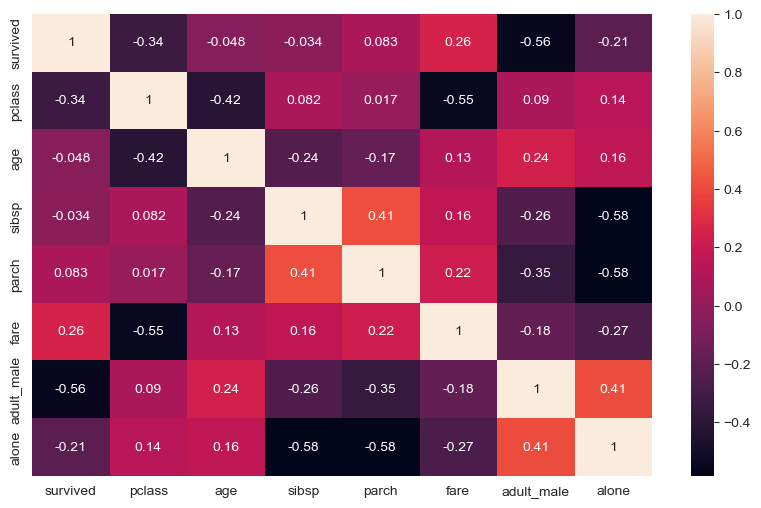

In [152]:
df_heatmap = df.drop(["sex", "who", "embark_town"], axis = 1)

plt.figure(figsize = (10, 6))
sns.heatmap(df_heatmap.corr(), annot = True)

In [153]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)
df

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,man,True,Southampton,True
887,1,1,female,30.0000,woman,False,Southampton,True
888,0,3,female,23.4500,woman,False,Southampton,False
889,1,1,male,30.0000,man,True,Cherbourg,True


In [154]:
sex = pd.get_dummies(df["sex"], drop_first = True,  dtype = int)
who = pd.get_dummies(df["who"], drop_first = True,  dtype = int)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True,  dtype = int)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True,  dtype = int)
alone = pd.get_dummies(df["alone"], drop_first = True,  dtype = int)

In [155]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1, )
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,1,1,0,1,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,0,0,1,0,0,0,0
2,1,3,female,7.9250,woman,False,Southampton,True,0,0,1,0,0,1,1
3,1,1,female,53.1000,woman,False,Southampton,False,0,0,1,0,0,1,0
4,0,3,male,8.0500,man,True,Southampton,True,1,1,0,1,0,1,1


In [156]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [157]:
df = df.rename(str,axis="columns") #cloumn names were showing errors 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   fare         889 non-null    float64
 3   male         889 non-null    int32  
 4   man          889 non-null    int32  
 5   woman        889 non-null    int32  
 6   True         889 non-null    int32  
 7   Queenstown   889 non-null    int32  
 8   Southampton  889 non-null    int32  
 9   True         889 non-null    int32  
dtypes: float64(1), int32(7), int64(2)
memory usage: 52.1 KB


**Modelling**

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [160]:
X = df.drop("survived", axis = 1)
y = df["survived"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [162]:
lr_model = LogisticRegression()

In [163]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [164]:
y_pred = lr_model.predict(X_test)

In [165]:
# Error matrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [167]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  30],
       [ 17,  65]], dtype=int64)

### K-Fold Cross Validation

**K-Fold Cross Validation is one of the methods of splitting the dataset for evaluating classification models and training the model.**

In [224]:
from sklearn.model_selection import cross_val_score

In [228]:
accu = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10)

In [230]:
accu

array([0.82089552, 0.7761194 , 0.80597015, 0.82089552, 0.76119403,
       0.80597015, 0.6969697 , 0.81818182, 0.74242424, 0.8030303 ])

In [232]:
accu.mean()

0.7851650836725463

In [238]:
new_accu = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10, scoring = "neg_mean_squared_error")
new_accu.mean()

-0.21483491632745366